# Aula 1

## Vídeo 1.2 - Carregando textos

In [1]:
import pandas as pd

In [2]:
url ='https://github.com/allanspadini/curso-tensorflow-proxima-palavra/raw/main/dados/train.zip'

In [3]:
df = pd.read_csv(url, header=None, names=['ClassIndex','Título','Descrição'])
df.head()

,ClassIndex,Título,Descrição
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


https://github.com/allanspadini/curso-tensorflow-proxima-palavra/blob/main/dados/classes.txt

In [4]:
df['Texto'] = df['Título'] + ' ' + df['Descrição']

In [5]:
df['Texto']

0         Wall St. Bears Claw Back Into the Black (Reute...
1         Carlyle Looks Toward Commercial Aerospace (Reu...
2         Oil and Economy Cloud Stocks' Outlook (Reuters...
3         Iraq Halts Oil Exports from Main Southern Pipe...
4         Oil prices soar to all-time record, posing new...
                                ...                        
119995    Pakistan's Musharraf Says Won't Quit as Army C...
119996    Renteria signing a top-shelf deal Red Sox gene...
119997    Saban not going to Dolphins yet The Miami Dolp...
119998    Today's NFL games PITTSBURGH at NY GIANTS Time...
119999    Nets get Carter from Raptors INDIANAPOLIS -- A...
Name: Texto, Length: 120000, dtype: object

In [6]:
df['ClassIndex'] = df['ClassIndex'] - 1

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_treino, X_teste, y_treino,y_teste = train_test_split(df['Texto'].values, df['ClassIndex'].values, test_size=0.2, random_state=4266)

## Vídeo 1.3 - Codificando o texto

In [9]:
import tensorflow as tf

2024-06-19 16:50:01.352268: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-19 16:50:02.066188: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [10]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)


2024-06-19 16:50:02.717628: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20974 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:35:00.0, compute capability: 8.9


In [11]:
encoder.adapt(X_treino)

In [12]:
encoder.get_vocabulary()[::10]

['',
 '39s',
 'it',
 'was',
 'more',
 'company',
 'than',
 'microsoft',
 'prices',
 'people',
 'next',
 'sales',
 'state',
 'most',
 'profit',
 'lead',
 'online',
 '39t',
 'red',
 'during',
 'say',
 'between',
 'country',
 'mobile',
 'quarter',
 'being',
 'dollar',
 'stock',
 'sox',
 'olympic',
 'users',
 'price',
 'how',
 'peace',
 'six',
 'key',
 'i',
 'should',
 'financial',
 'leaders',
 'house',
 'sun',
 'used',
 'seven',
 'israel',
 'future',
 'trial',
 'half',
 'customers',
 'defense',
 'arafat',
 'northern',
 'due',
 'men',
 'hopes',
 'using',
 'scored',
 'university',
 'texas',
 'mark',
 'we',
 'accused',
 'profits',
 '18',
 'possible',
 'call',
 'rally',
 'teams',
 'division',
 '7',
 'takeover',
 'production',
 'outlook',
 'began',
 'helped',
 'opening',
 'sept',
 'spain',
 'hours',
 'starting',
 'nine',
 'pressure',
 'executives',
 'personal',
 'once',
 'italian',
 'push',
 'continued',
 'rising',
 'kill',
 'powerful',
 'side',
 'designed',
 'groups',
 'mission',
 'najaf',
 '

In [13]:
Exemplo = "Today's NFL games PITTSBURGH at NY GIANTS"

In [14]:
encoder(Exemplo)

<tf.Tensor: shape=(7,), dtype=int64, numpy=array([  1, 713, 202,   1,  14,   1, 516])>

## Vídeo 1.4 - Criando um modelo

In [15]:
modelo = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=16,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')

])

In [16]:
# Compilar o modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

https://projector.tensorflow.org/

In [17]:
X_teste[0]

'Border Patrol Training Moves Near Mexico (AP) AP - Incoming Border Patrol agents will train closer to the U.S.-Mexican border when the federal government relocates their academy to Artesia, N.M., Customs and Border Protection announced Thursday.'

In [18]:
y_teste[0]

0

In [19]:
X_teste.shape

(24000,)

In [20]:
modelo.predict(X_teste[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


array([[0.24645628, 0.24776942, 0.2520367 , 0.25373763]], dtype=float32)

In [21]:
modelo.predict(X_teste[:1]).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([3])

# Aula 2 - Classificando o texto

## Vídeo 2.1: Treinando com camadas densas

In [22]:
epocas = 10

In [23]:
history = modelo.fit(X_treino, y_treino, epochs=epocas, validation_data=(X_teste, y_teste))

Epoch 1/10


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4662 - loss: 1.3224 - val_accuracy: 0.7714 - val_loss: 0.9293
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7909 - loss: 0.8150 - val_accuracy: 0.8161 - val_loss: 0.6001
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8266 - loss: 0.5588 - val_accuracy: 0.8359 - val_loss: 0.4982
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8434 - loss: 0.4750 - val_accuracy: 0.8455 - val_loss: 0.4562
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8533 - loss: 0.4416 - val_accuracy: 0.8531 - val_loss: 0.4346
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8571 - loss: 0.4240 - val_accuracy: 0.8565 - val_loss: 0.4213
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8626 - loss: 0.4064 - val_accuracy: 0.8584 - val_loss: 0.4129
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8662 - loss: 0.3951 - val_accurac

In [24]:
import matplotlib.pyplot as plt

In [25]:
def plota_resultados(history,epocas):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  intervalo_epocas = range(epocas)
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(intervalo_epocas, acc, label='Acurácia do Treino')
  plt.plot(intervalo_epocas, val_acc, label='Acurácia da Validação')
  plt.legend(loc='lower right')


  plt.subplot(1, 2, 2)
  plt.plot(intervalo_epocas, loss, label='Custo do Treino')
  plt.plot(intervalo_epocas, val_loss, label='Custo da Validação')
  plt.legend(loc='upper right')
  plt.show()

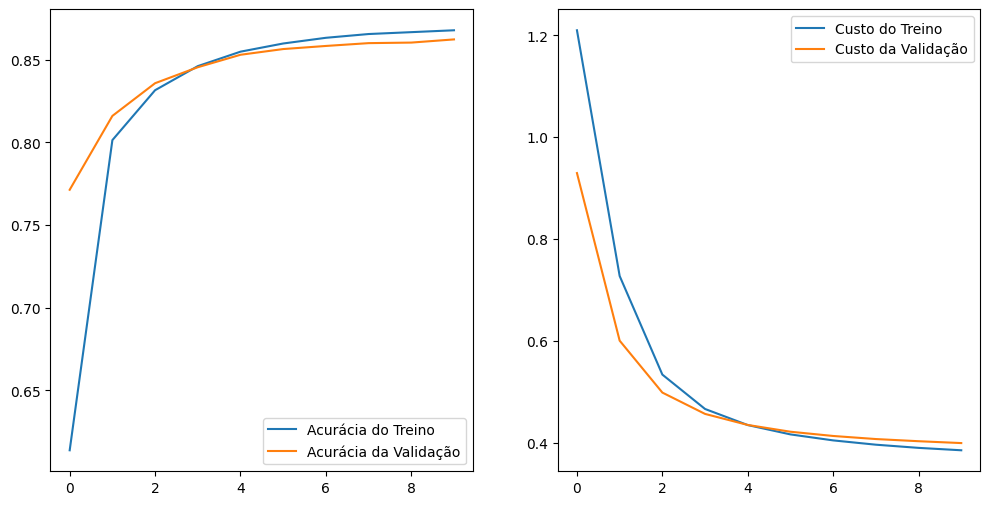

In [26]:
plota_resultados(history,epocas)

## Vídeo 2.2: Adicionando camadas convolucionais

In [27]:
modelo = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=16,
        mask_zero=True
    ),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Conv1D(128, kernel_size=4, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [28]:
# Compilar o modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
history = modelo.fit(X_treino, y_treino, epochs=epocas, validation_data=(X_teste, y_teste))

Epoch 1/10


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/layer.py:877: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
2024-06-19 16:51:05.636052: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8900


  31/3000 ━━━━━━━━━━━━━━━━━━━━ 3:31 71ms/step - accuracy: 0.2397 - loss: 1.3868

1244/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.3746 - loss: 1.2903 

: 

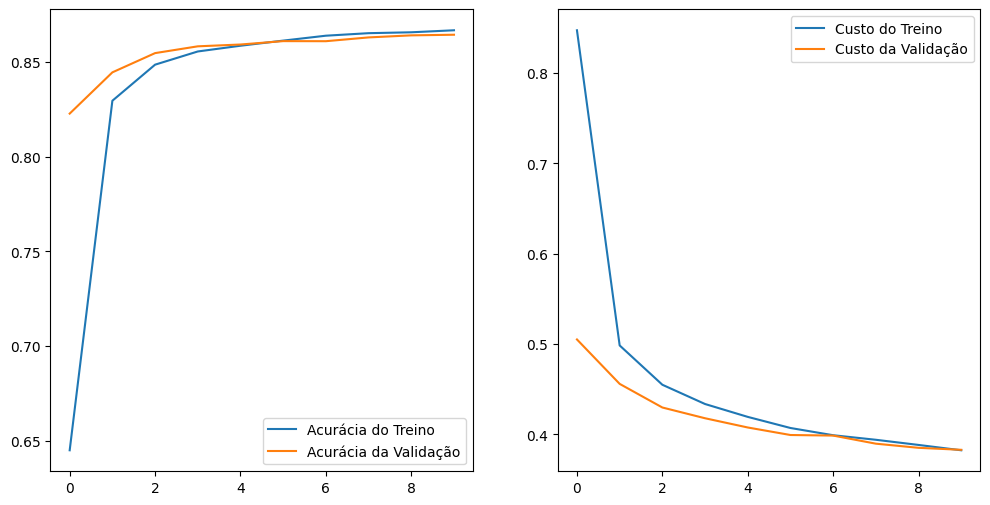

In [ ]:
plota_resultados(history,epocas)

## Vídeo 2.3 - Adicionando camadas LSTM

In [31]:
modelo = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        mask_zero=True
    ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),  # Camada BiLSTM
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [32]:
# Compilar o modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
epocas = 20

In [34]:
history = modelo.fit(X_treino, y_treino, epochs=epocas, validation_data=(X_teste, y_teste))

Epoch 1/20


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 254s 83ms/step - accuracy: 0.5881 - loss: 0.9290 - val_accuracy: 0.8395 - val_loss: 0.4467
Epoch 2/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 247s 82ms/step - accuracy: 0.8442 - loss: 0.4645 - val_accuracy: 0.8517 - val_loss: 0.4215
Epoch 3/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 250s 83ms/step - accuracy: 0.8524 - loss: 0.4445 - val_accuracy: 0.8599 - val_loss: 0.4034
Epoch 4/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 246s 82ms/step - accuracy: 0.8617 - loss: 0.4126 - val_accuracy: 0.8643 - val_loss: 0.3900
Epoch 5/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 248s 83ms/step - accuracy: 0.8681 - loss: 0.3928 - val_accuracy: 0.8637 - val_loss: 0.3870
Epoch 6/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 252s 84ms/step - accuracy: 0.8707 - loss: 0.3824 - val_accuracy: 0.8688 - val_loss: 0.3761
Epoch 7/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 249s 83ms/step - accuracy: 0.8731 - loss: 0.3736 - val_accuracy: 0.8649 - val_loss: 0.3769
Epoch 8/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 247s 82ms/step - accuracy: 0.8739 - lo

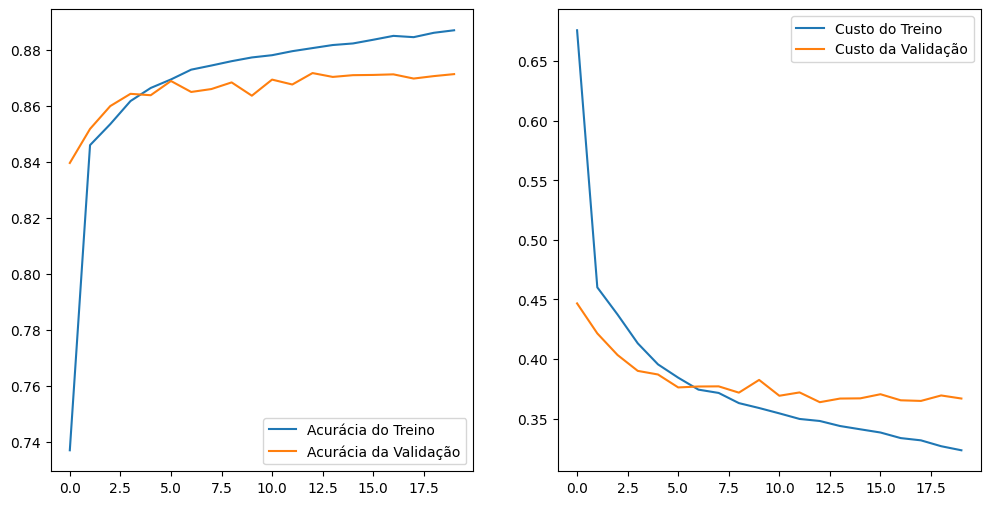

In [35]:
plota_resultados(history,epocas)

In [41]:
modelo.predict(X_teste[1:2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.94047403, 0.01176369, 0.03491015, 0.01285213]], dtype=float32)

In [42]:
modelo.predict(X_teste[1:2]).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([0])

In [43]:
y_teste[1]

0

# Aula 3 - Validando os resultados

## Vídeo 3.1 - Buscando os melhores parâmetros

In [38]:
#%pip install keras-tuner

In [39]:
import keras_tuner as kt

In [34]:
# Função para criar o modelo
def build_model(hp):
    model = tf.keras.Sequential([
        encoder,
        tf.keras.layers.Embedding(
            input_dim=len(encoder.get_vocabulary()),
            output_dim=hp.Int('embedding_dim', min_value=32, max_value=128, step=32),
            mask_zero=True
        ),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
            units=hp.Int('lstm_units', min_value=32, max_value=128, step=32),
            return_sequences=True
        )),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
            units=hp.Int('lstm_units', min_value=16, max_value=64, step=16)
        )),
        tf.keras.layers.Dense(
            units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
            activation='relu'
        ),
        tf.keras.layers.Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [35]:
# Configuração do tuner para otimização de hiperparâmetros
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=5,
    factor=3,
    directory='my_dir',
    project_name='classification_optimization'
)

## Vídeo 3.2 - Aplicando a validação cruzada

In [36]:
from sklearn.model_selection import KFold

In [37]:
# Função para fazer a validação cruzada e otimização de hiperparâmetros
def run_tuner(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for train_index, val_index in kf.split(X):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        tuner.search(X_train_fold, y_train_fold, epochs=10, validation_data=(X_val_fold, y_val_fold))

    # Resumo dos melhores hiperparâmetros encontrados
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    print(f"""
          A pesquisa de hiperparâmetros foi concluída. O número ideal de dimensões de incorporação é {best_hps.get('embedding_dim')},
          o número ideal de unidades LSTM é {best_hps.get('lstm_units')}, e
          o número ideal de unidades densas é {best_hps.get('dense_units')},
          e a taxa de abandono ideal é {best_hps.get('dropout')}.
    """)

    return best_hps

In [38]:
best_hps = run_tuner(X_treino, y_treino)

Trial 10 Complete [00h 02m 00s]
val_accuracy: 0.8687499761581421

Best val_accuracy So Far: 0.8697395920753479
Total elapsed time: 00h 12m 09s

          A pesquisa de hiperparâmetros foi concluída. O número ideal de dimensões de incorporação é 96,
          o número ideal de unidades LSTM é 64, e
          o número ideal de unidades densas é 96,
          e a taxa de abandono ideal é 0.2.
    


## Vídeo 3.3 - Testando a rede

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [40]:
# Criar o modelo final usando os melhores hiperparâmetros
final_model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=best_hps.get('embedding_dim'),
        mask_zero=True
    ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
        units=best_hps.get('lstm_units'),
        return_sequences=True
    )),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
        units=best_hps.get('lstm_units') // 2
    )),
    tf.keras.layers.Dense(
        units=best_hps.get('dense_units'),
        activation='relu'
    ),
    tf.keras.layers.Dropout(rate=best_hps.get('dropout')),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [41]:
# Compilar o modelo final
final_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
# Treinar o modelo final com todos os dados de treinamento
final_model.fit(X_treino, y_treino, epochs=10, validation_data=(X_teste, y_teste))

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - accuracy: 0.7744 - loss: 0.5834 - val_accuracy: 0.8616 - val_loss: 0.3888
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.8624 - loss: 0.3862 - val_accuracy: 0.8695 - val_loss: 0.3645
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.8752 - loss: 0.3455 - val_accuracy: 0.8609 - val_loss: 0.3846
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.8819 - loss: 0.3300 - val_accuracy: 0.8737 - val_loss: 0.3543
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.8922 - loss: 0.2985 - val_accuracy: 0.8737 - val_loss: 0.3515
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.8981 - loss: 0.2793 - val_accuracy: 0.8738 - val_loss: 0.3532
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.9061 - loss: 0.2535 - val_accuracy: 0.8763 - val_loss: 0.3579
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.9141 - loss: 0

In [43]:
# Fazer previsões no conjunto de teste
y_pred = final_model.predict(X_teste)
y_pred_classes = y_pred.argmax(axis=1)

750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [44]:
# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_teste, y_pred_classes)

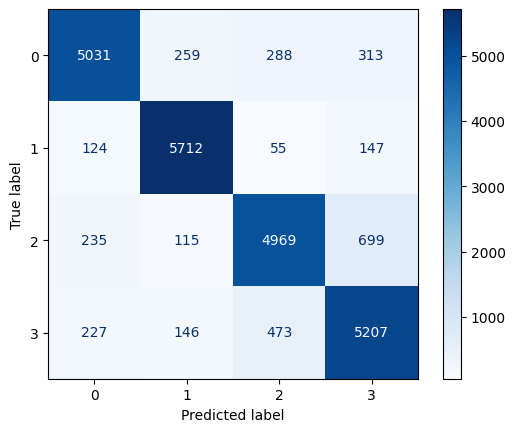

In [45]:
# Mostrar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1, 2, 3])
disp.plot(cmap=plt.cm.Blues)
plt.show()